In [1]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 

In [2]:
os.chdir("C:/Users/hp/Downloads/VehiclePerformancePrediction/Vehicle Performance Prediction/Dataset")
df = pd.read_csv('data.csv')

In [3]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [4]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [5]:
df.tail()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024
397,1,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455


In [6]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [7]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [8]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
df.replace('?',np.nan,inplace=True)

In [11]:
df['horsepower'].tail(60)

338     84
339     84
340     92
341    110
342     84
343     58
344     64
345     60
346     67
347     65
348     62
349     68
350     63
351     65
352     65
353     74
354    NaN
355     75
356     75
357    100
358     74
359     80
360     76
361    116
362    120
363    110
364    105
365     88
366     85
367     88
368     88
369     88
370     85
371     84
372     90
373     92
374    NaN
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: horsepower, dtype: object

In [12]:
df['horsepower'] = df['horsepower'].astype(float)  #data type convert object to float

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [14]:
df['horsepower'].isna().sum()

6

In [15]:
df['horsepower'].isna().sum()/(len(df))*100

1.507537688442211

<AxesSubplot:>

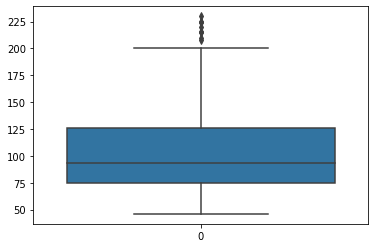

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(data=df['horsepower'])

In [17]:
avg = df['horsepower'].astype('float').median(axis=0)   # here outliers are present so repalce by median

In [18]:
df['horsepower'].replace(np.nan,avg,inplace=True)
df['horsepower'].isna().sum()

0

In [19]:
df.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


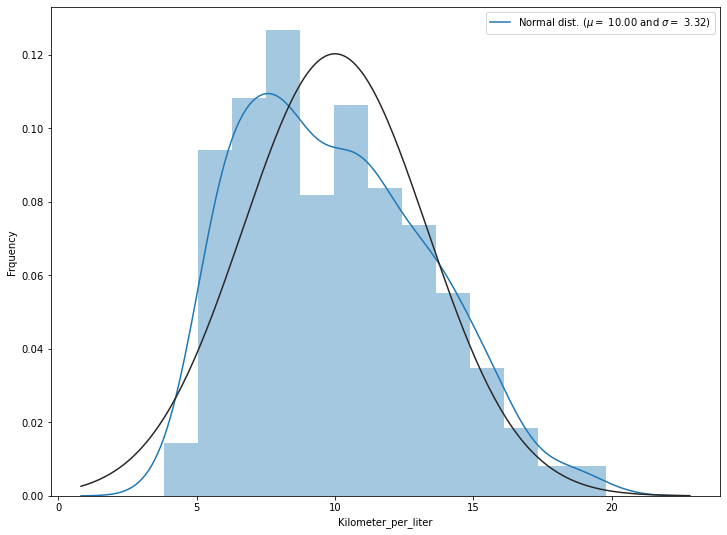

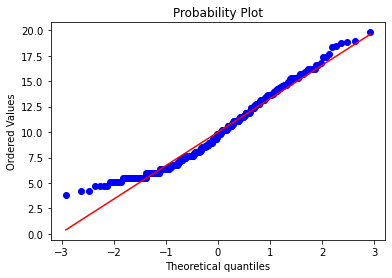

In [20]:
plt.subplots(figsize = (12,9))
sns.distplot(df['Kilometer_per_liter'], fit = stats.norm)

#get the fitted parameter used by the function 
(mu,sigma) = stats.norm.fit(df['Kilometer_per_liter'])
#plot with the distribution 
plt.legend(['Normal dist. ($\mu= $ {:.2f} and $\sigma= $ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frquency')
#probability plot
fig = plt.figure()
stats.probplot(df['Kilometer_per_liter'], plot=plt)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


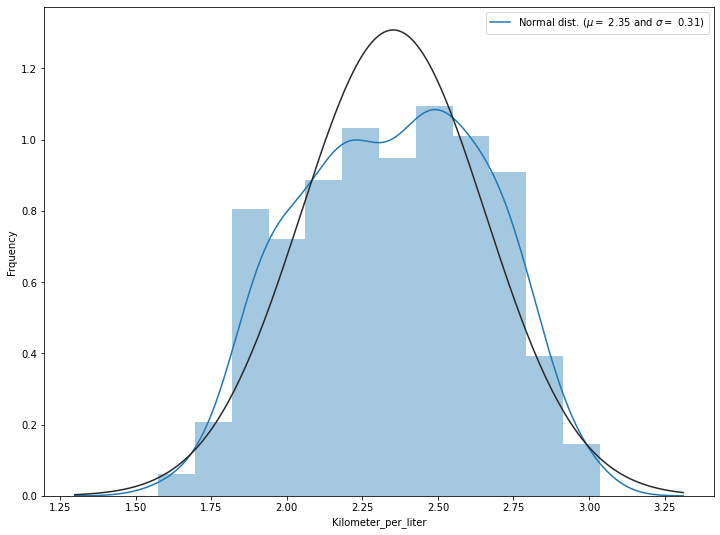

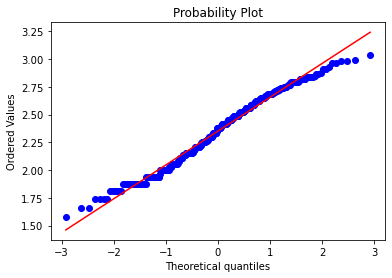

In [21]:
#we use the which is a part of numpy libray
df['Kilometer_per_liter'] = np.log1p(df['Kilometer_per_liter'])
#check again for normal distribution
plt.subplots(figsize = (12,9))
sns.distplot(df['Kilometer_per_liter'], fit = stats.norm)

#get the fitted parameter used by the function 
(mu,sigma) = stats.norm.fit(df['Kilometer_per_liter'])
#plot with the distribution 
plt.legend(['Normal dist. ($\mu= $ {:.2f} and $\sigma= $ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frquency')
#probability plot
fig = plt.figure()
stats.probplot(df['Kilometer_per_liter'], plot=plt)
plt.show()

In [22]:
#correlation between train attribute 
#seperate data which has only numeric values 
df_corr = df.select_dtypes(include=[np.number])

In [23]:
df_corr.shape

(398, 8)

<AxesSubplot:>

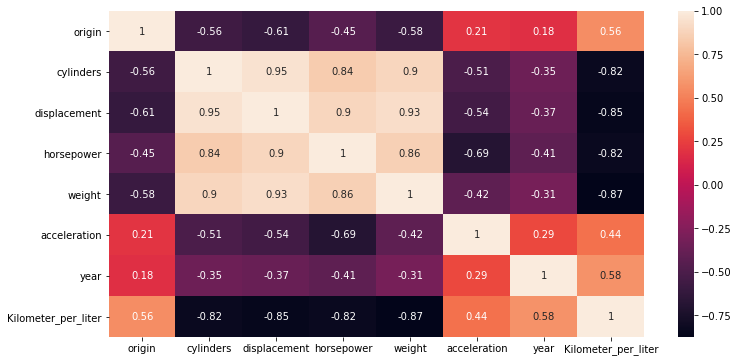

In [24]:
#correlation plot
corr = df_corr.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True)

In [25]:
print('Find the most important features realtive to the target')
corr = df.corr()
corr.sort_values(['Kilometer_per_liter'], ascending=False, inplace=True)
corr.Kilometer_per_liter

Find the most important features realtive to the target


Kilometer_per_liter    1.000000
year                   0.577211
origin                 0.560084
acceleration           0.443890
horsepower            -0.822592
cylinders             -0.822682
displacement          -0.850550
weight                -0.872846
Name: Kilometer_per_liter, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


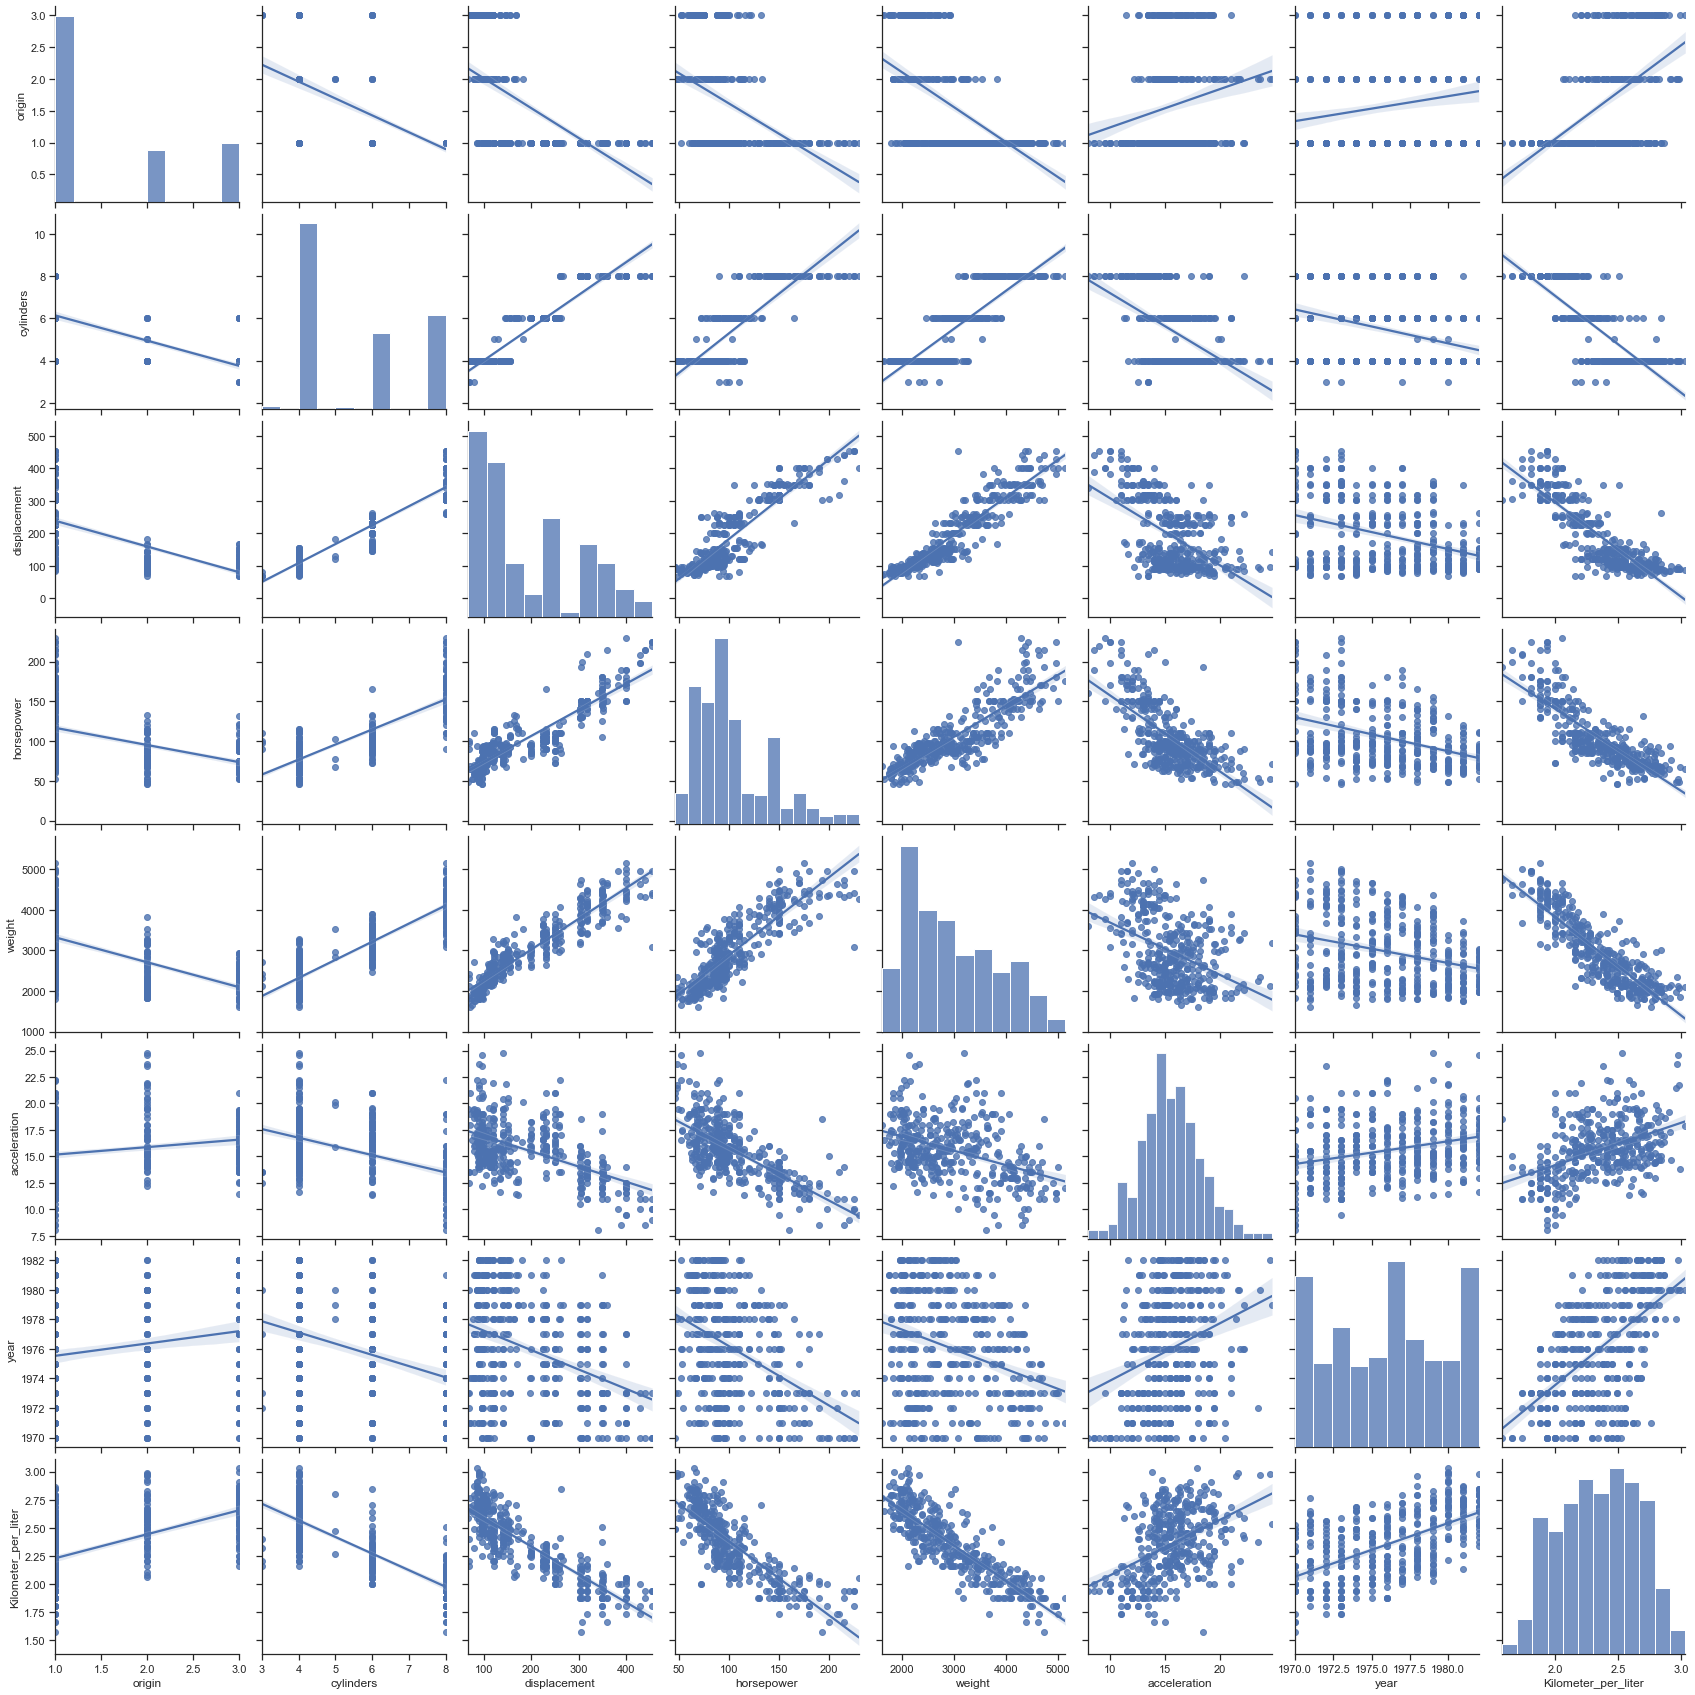

In [26]:
col = ['origin', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year','Kilometer_per_liter']
sns.set(style='ticks')
sns.pairplot(df[col], size=3, kind='reg')

In [80]:
df_cat = df.select_dtypes(include = 'object').columns

In [29]:
#Label encoding categorical variables
for c in df_cat:
    lbl = LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c] = lbl.transform(list(df[c].values)) 

In [30]:
df[c].dtype

dtype('int64')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    int64  
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


### LR simple model

In [32]:
#Preapring data for prediction
y = df['Kilometer_per_liter']

In [33]:
x=df.drop(['Kilometer_per_liter'],axis=1)

In [34]:
x.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name'],
      dtype='object')

In [35]:
y

0      2.157858
1      1.998388
2      2.157858
3      2.054418
4      2.107475
         ...   
393    2.524038
394    2.980940
395    2.681336
396    2.557539
397    2.651794
Name: Kilometer_per_liter, Length: 398, dtype: float64

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm1=LinearRegression()

In [38]:
lm1.fit(x,y)

LinearRegression()

In [39]:
print("Intercept for multiple linear regression is:",lm1.intercept_)
print("coef for multiple linear regressionis:",lm1.coef_)

Intercept for multiple linear regression is: -50.37961112536195
coef for multiple linear regressionis: [ 3.44370476e-02 -2.23001206e-02  5.77701740e-04 -1.07316118e-03
 -2.41170892e-04 -1.28651783e-05  2.70743111e-02  1.10939830e-04]


In [40]:
yhat1=lm1.predict(x)

In [41]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,yhat1)
r_squared=r2_score(y,yhat1)

In [42]:
from math import sqrt
rmse = sqrt(mse)

In [43]:
print("Mean_squared_error:",mse)
print("Root_mean_sqaured_error:",rmse)
print("r_squared_value:",r_squared)

Mean_squared_error: 0.011468613132175867
Root_mean_sqaured_error: 0.10709161093277039
r_squared_value: 0.8768191468474628


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


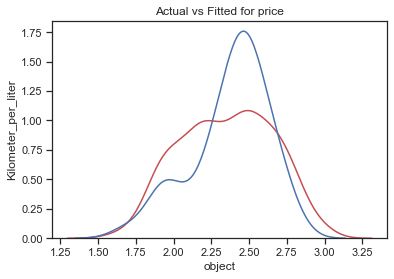

In [82]:
#distribution plot to compare actual vs predicted values for price
ax1=sns.distplot(df['Kilometer_per_liter'],hist=False,color='r',label='Actual values')
sns.distplot(yhat1,hist=False,color='b',label='Fitted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('object')
plt.ylabel('Kilometer_per_liter')
plt.show()

### Standard Scalling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scale = StandardScaler()

In [46]:
x_sc = scale.fit_transform(x)

In [47]:
lm_sc = lm1.fit(x_sc,y)

In [48]:
yhat_sc = lm1.predict(x_sc)

In [49]:
mse = mean_squared_error(y,yhat_sc)
r_squared=r2_score(y,yhat_sc)
rmse=sqrt(mse)

In [50]:
print("mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

mean_squared_error: 0.011468613132175854
Root_mean_squared_error: 0.10709161093277034
r_square_value: 0.8768191468474629


### split data into train and test format

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=7)

In [52]:
#perform linear regression
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression()

In [54]:
lm.fit(x_train, y_train)

LinearRegression()

In [55]:
#score/Accuracy
print('Accuracy', lm.score(x_test, y_test)*100)

Accuracy 80.2667324559435


In [56]:
yhat=lm.predict(x)

In [57]:
yhat.shape

(398,)

In [58]:
print(lm.intercept_)

-51.01700242894268


In [59]:
y_pred=lm.predict(x_test)
y_pred

array([2.50548774, 2.52421812, 2.68484733, 2.44687493, 2.77621472,
       2.82036003, 2.50515725, 2.66823987, 2.46996876, 2.68133559,
       2.49430262, 1.73260029, 2.4785961 , 2.44477436, 2.22874484,
       2.58770116, 2.5749982 , 2.32792464, 2.29602134, 2.66024999,
       2.45452254, 2.36739155, 2.64677897, 2.44882102, 2.37534855,
       1.95583376, 1.9043448 , 2.47274853, 2.40299662, 2.40658334,
       2.12608911, 2.75631406, 2.4530097 , 2.71928079, 2.50830661,
       2.69996861, 2.35799157, 2.28059344, 2.6808175 , 2.59132188,
       2.30271727, 2.34986697, 2.47433464, 1.66624533, 1.89555391,
       1.98440473, 2.35703813, 1.99649613, 2.47156843, 2.36051418,
       1.9371943 , 2.41238841, 2.45108275, 2.53025937, 2.00854264,
       2.62351807, 2.26561883, 2.54296354, 2.22301701, 2.37742371,
       2.38599449, 2.25056154, 2.08323302, 2.52090314, 1.9217158 ,
       2.46336994, 2.59193627, 2.18541574, 2.13450205, 2.55254321,
       2.27925061, 2.25055769, 1.92653693, 2.472559  , 2.32436

In [60]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)

In [61]:
from math import sqrt
rmse = sqrt(mse)

In [62]:
print("Mean_squared_error:",mse)
print("Root_mean_sqaured_error:",rmse)
print("r_squared_value:",r_squared)

Mean_squared_error: 0.014912563488227554
Root_mean_sqaured_error: 0.1221170073668183
r_squared_value: 0.802667324559435


In [63]:
yhat1=lm.predict(x_test)
yhat1

array([2.50548774, 2.52421812, 2.68484733, 2.44687493, 2.77621472,
       2.82036003, 2.50515725, 2.66823987, 2.46996876, 2.68133559,
       2.49430262, 1.73260029, 2.4785961 , 2.44477436, 2.22874484,
       2.58770116, 2.5749982 , 2.32792464, 2.29602134, 2.66024999,
       2.45452254, 2.36739155, 2.64677897, 2.44882102, 2.37534855,
       1.95583376, 1.9043448 , 2.47274853, 2.40299662, 2.40658334,
       2.12608911, 2.75631406, 2.4530097 , 2.71928079, 2.50830661,
       2.69996861, 2.35799157, 2.28059344, 2.6808175 , 2.59132188,
       2.30271727, 2.34986697, 2.47433464, 1.66624533, 1.89555391,
       1.98440473, 2.35703813, 1.99649613, 2.47156843, 2.36051418,
       1.9371943 , 2.41238841, 2.45108275, 2.53025937, 2.00854264,
       2.62351807, 2.26561883, 2.54296354, 2.22301701, 2.37742371,
       2.38599449, 2.25056154, 2.08323302, 2.52090314, 1.9217158 ,
       2.46336994, 2.59193627, 2.18541574, 2.13450205, 2.55254321,
       2.27925061, 2.25055769, 1.92653693, 2.472559  , 2.32436

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


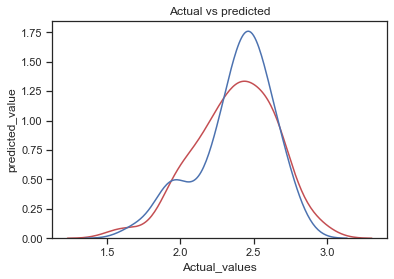

In [64]:
#distribution plot to compare actual vs predicted values for price
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(y_pred,hist=False,color='b',label='Fitted values',ax=ax1)
plt.title('Actual vs predicted')
plt.xlabel('Actual_values')
plt.ylabel('predicted_value')
plt.show()

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly = PolynomialFeatures(degree=2)

In [67]:
x_train_poly = poly.fit_transform(x_train)

In [68]:
model_poly =lm.fit(x_train_poly,y_train)

In [69]:
x_test_poly = poly.fit_transform(x_test)

In [70]:
model_poly = lm.predict(x_test_poly)

In [71]:
yhat_poly2 = lm.predict(x_test_poly)

In [72]:
yhat_poly2[0:5]

array([2.5864334 , 2.55118148, 2.76884677, 2.56795343, 2.82820265])

In [73]:
y_test[0:5]

148    2.489375
389    2.337292
350    2.756998
52     2.621352
332    2.615151
Name: Kilometer_per_liter, dtype: float64

In [74]:
print('R squared using polynomial Regression:',r2_score(y_test,yhat_poly2))
print('Mean squared error using Ploynomial Regression:',mean_squared_error(y_test,yhat_poly2))
print('Root mean squared error using Polynomail Regression:', np.sqrt(mean_squared_error(y_test,yhat_poly2)))

R squared using polynomial Regression: 0.497782286689309
Mean squared error using Ploynomial Regression: 0.03795293160616919
Root mean squared error using Polynomail Regression: 0.19481512160550882


#### cross validation

In [83]:
from sklearn.model_selection import cross_val_score    #cross validation 

In [164]:
Rcross = cross_val_score(lm,x_train,y_train, cv=4)

In [165]:
Rcross

array([0.88260894, 0.89802039, 0.86105848, 0.8999886 ])

In [166]:
Rcross = cross_val_score(lm,x_test_poly,y_test, cv=4)

In [167]:
Rcross

array([-1.16594743,  0.03187322, -0.27443533, -5.87508321])

#### Ridge Regression

In [89]:
from sklearn.linear_model import Ridge

In [141]:
Ridgemodel = Ridge(alpha=0.1)

In [142]:
Ridgemodel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [143]:
yhat_Ridge = Ridgemodel.predict(x_test)

In [144]:
print('Predicted', yhat[0:4])

Predicted [1.99230085 1.94217167 2.02030191 1.98440473]


In [145]:
print('Test set values', y_test[0:4])

Test set values 148    2.489375
389    2.337292
350    2.756998
52     2.621352
Name: Kilometer_per_liter, dtype: float64


In [146]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,yhat_Ridge)
r_squared=r2_score(y_test,yhat_Ridge)

In [147]:
from math import sqrt
rmse = sqrt(mse)

In [148]:
print("Mean_squared_error:",mse)
print("Root_mean_sqaured_error:",rmse)
print("r_squared_value:",r_squared)

Mean_squared_error: 0.014910946968018484
Root_mean_sqaured_error: 0.12211038845249197
r_squared_value: 0.8026887153993139


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


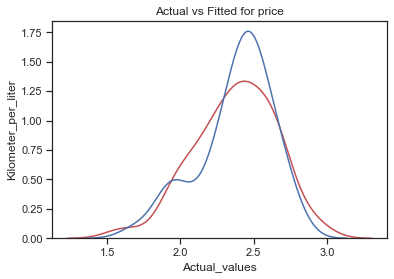

In [160]:
#distribution plot to compare actual vs predicted values for price
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(yhat_Ridge,hist=False,color='b',label='Fitted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Actual_values')
plt.ylabel('Kilometer_per_liter')
plt.show()

#### grid search for hyperparameter tuning

In [149]:
from sklearn.model_selection import GridSearchCV 

In [150]:
parameters1 = [{'alpha': [0.001,0.1,1,10,100,1000,10000,100000]}]

In [151]:
RR = Ridge()
RR

Ridge()

In [152]:
Grid1= GridSearchCV(RR, parameters1, cv=4)

In [153]:
Grid1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [154]:
BestRR = Grid1.best_estimator_

In [155]:
BestRR

Ridge(alpha=10)

In [124]:
BestRR.score(x_test,y_test)

0.8044632523183377

In [168]:
Rcross2 = cross_val_score(BestRR,x_test,y_test, cv=4)
Rcross2

array([0.74626478, 0.81076815, 0.63969784, 0.79421135])